In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'E:\Work & Study\MBA\T3\MLP\Drug_Consumption.csv')

In [3]:
df.head()

ID    Age Gender                          Education Country Ethnicity  \
0   2  25-34      M                   Doctorate degree      UK     White   
1   3  35-44      M  Professional certificate/ diploma      UK     White   
2   4  18-24      F                     Masters degree      UK     White   
3   5  35-44      F                   Doctorate degree      UK     White   
4   6    65+      F            Left school at 18 years  Canada     White   

    Nscore   Escore   Oscore   AScore  ...  Ecstasy  Heroin  Ketamine Legalh  \
0 -0.67825  1.93886  1.43533  0.76096  ...      CL4     CL0       CL2    CL0   
1 -0.46725  0.80523 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0   
2 -0.14882 -0.80615 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0   
3  0.73545 -1.63340 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1   
4 -0.67825 -0.30033 -1.55521  2.03972  ...      CL0     CL0       CL0    CL0   

   LSD Meth Mushrooms Nicotine Semer  VSA  
0  CL2  CL3       CL0      CL4   CL0  CL0  
1  CL0  CL0       CL1      CL0   CL0  CL0  
2  CL0  CL0       CL0      CL2   CL0  CL0  
3  CL0  CL0       CL2      CL2   CL0  CL0  
4  CL0  CL0       CL0      CL6   CL0  CL0  

[5 rows x 32 columns]

In [4]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [5]:
df.dtypes

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [6]:
df.size

60288

In [7]:
df.shape

(1884, 32)

In [8]:
df.describe

<bound method NDFrame.describe of         ID    Age Gender                                          Education  \
0        2  25-34      M                                   Doctorate degree   
1        3  35-44      M                  Professional certificate/ diploma   
2        4  18-24      F                                     Masters degree   
3        5  35-44      F                                   Doctorate degree   
4        6    65+      F                            Left school at 18 years   
...    ...    ...    ...                                                ...   
1879  1884  18-24      F  Some college or university, no certificate or ...   
1880  1885  18-24      M  Some college or university, no certificate or ...   
1881  1886  25-34      F                                  University degree   
1882  1887  18-24      F  Some college or university, no certificate or ...   
1883  1888  18-24      M  Some college or university, no certificate or ...   

                 

In [9]:
df.info

<bound method DataFrame.info of         ID    Age Gender                                          Education  \
0        2  25-34      M                                   Doctorate degree   
1        3  35-44      M                  Professional certificate/ diploma   
2        4  18-24      F                                     Masters degree   
3        5  35-44      F                                   Doctorate degree   
4        6    65+      F                            Left school at 18 years   
...    ...    ...    ...                                                ...   
1879  1884  18-24      F  Some college or university, no certificate or ...   
1880  1885  18-24      M  Some college or university, no certificate or ...   
1881  1886  25-34      F                                  University degree   
1882  1887  18-24      F  Some college or university, no certificate or ...   
1883  1888  18-24      M  Some college or university, no certificate or ...   

                  C

In [14]:
#duplicate values
df[df.duplicated(keep = 'last')]

Empty DataFrame
Columns: [ID, Age, Gender, Education, Country, Ethnicity, Nscore, Escore, Oscore, AScore, Cscore, Impulsive, SS, Alcohol, Amphet, Amyl, Benzos, Caff, Cannabis, Choc, Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh, LSD, Meth, Mushrooms, Nicotine, Semer, VSA]
Index: []

[0 rows x 32 columns]

In [15]:
df['Ethnicity'].unique()

array(['White', 'Other', 'Mixed-White/Black', 'Asian',
       'Mixed-White/Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

In [16]:
df['Country'].unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [17]:
df['Age']

0       25-34
1       35-44
2       18-24
3       35-44
4         65+
        ...  
1879    18-24
1880    18-24
1881    25-34
1882    18-24
1883    18-24
Name: Age, Length: 1884, dtype: object

In [18]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [19]:
#numerical and categorical values
num_atr = ['ID']
cat_atr = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
flt_atr = ['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']

In [20]:
#standardization on float and categorical values
le = LabelEncoder()
df[flt_atr] = df[flt_atr].apply(le.fit_transform)
df[cat_atr] = df[cat_atr].apply(le.fit_transform)

In [21]:
df.head()

ID  Age  Gender  Education  Country  Ethnicity  Nscore  Escore  Oscore  \
0   2    1       1          0        5          6      17      35      29   
1   3    2       1          6        5          6      19      28      14   
2   4    0       0          5        5          6      22      17      20   
3   5    2       0          0        5          6      31      11      17   
4   6    5       0          3        1          6      17      21       9   

   AScore  ...  Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  Mushrooms  \
0      28  ...        4       0         2       0    2     3          0   
1      12  ...        0       0         0       0    0     0          1   
2      27  ...        0       0         2       0    0     0          0   
3      21  ...        1       0         0       1    0     0          2   
4      35  ...        0       0         0       0    0     0          0   

   Nicotine  Semer  VSA  
0         4      0    0  
1         0      0    0  
2         2      0    0  
3         2      0    0  
4         6      0    0  

[5 rows x 32 columns]

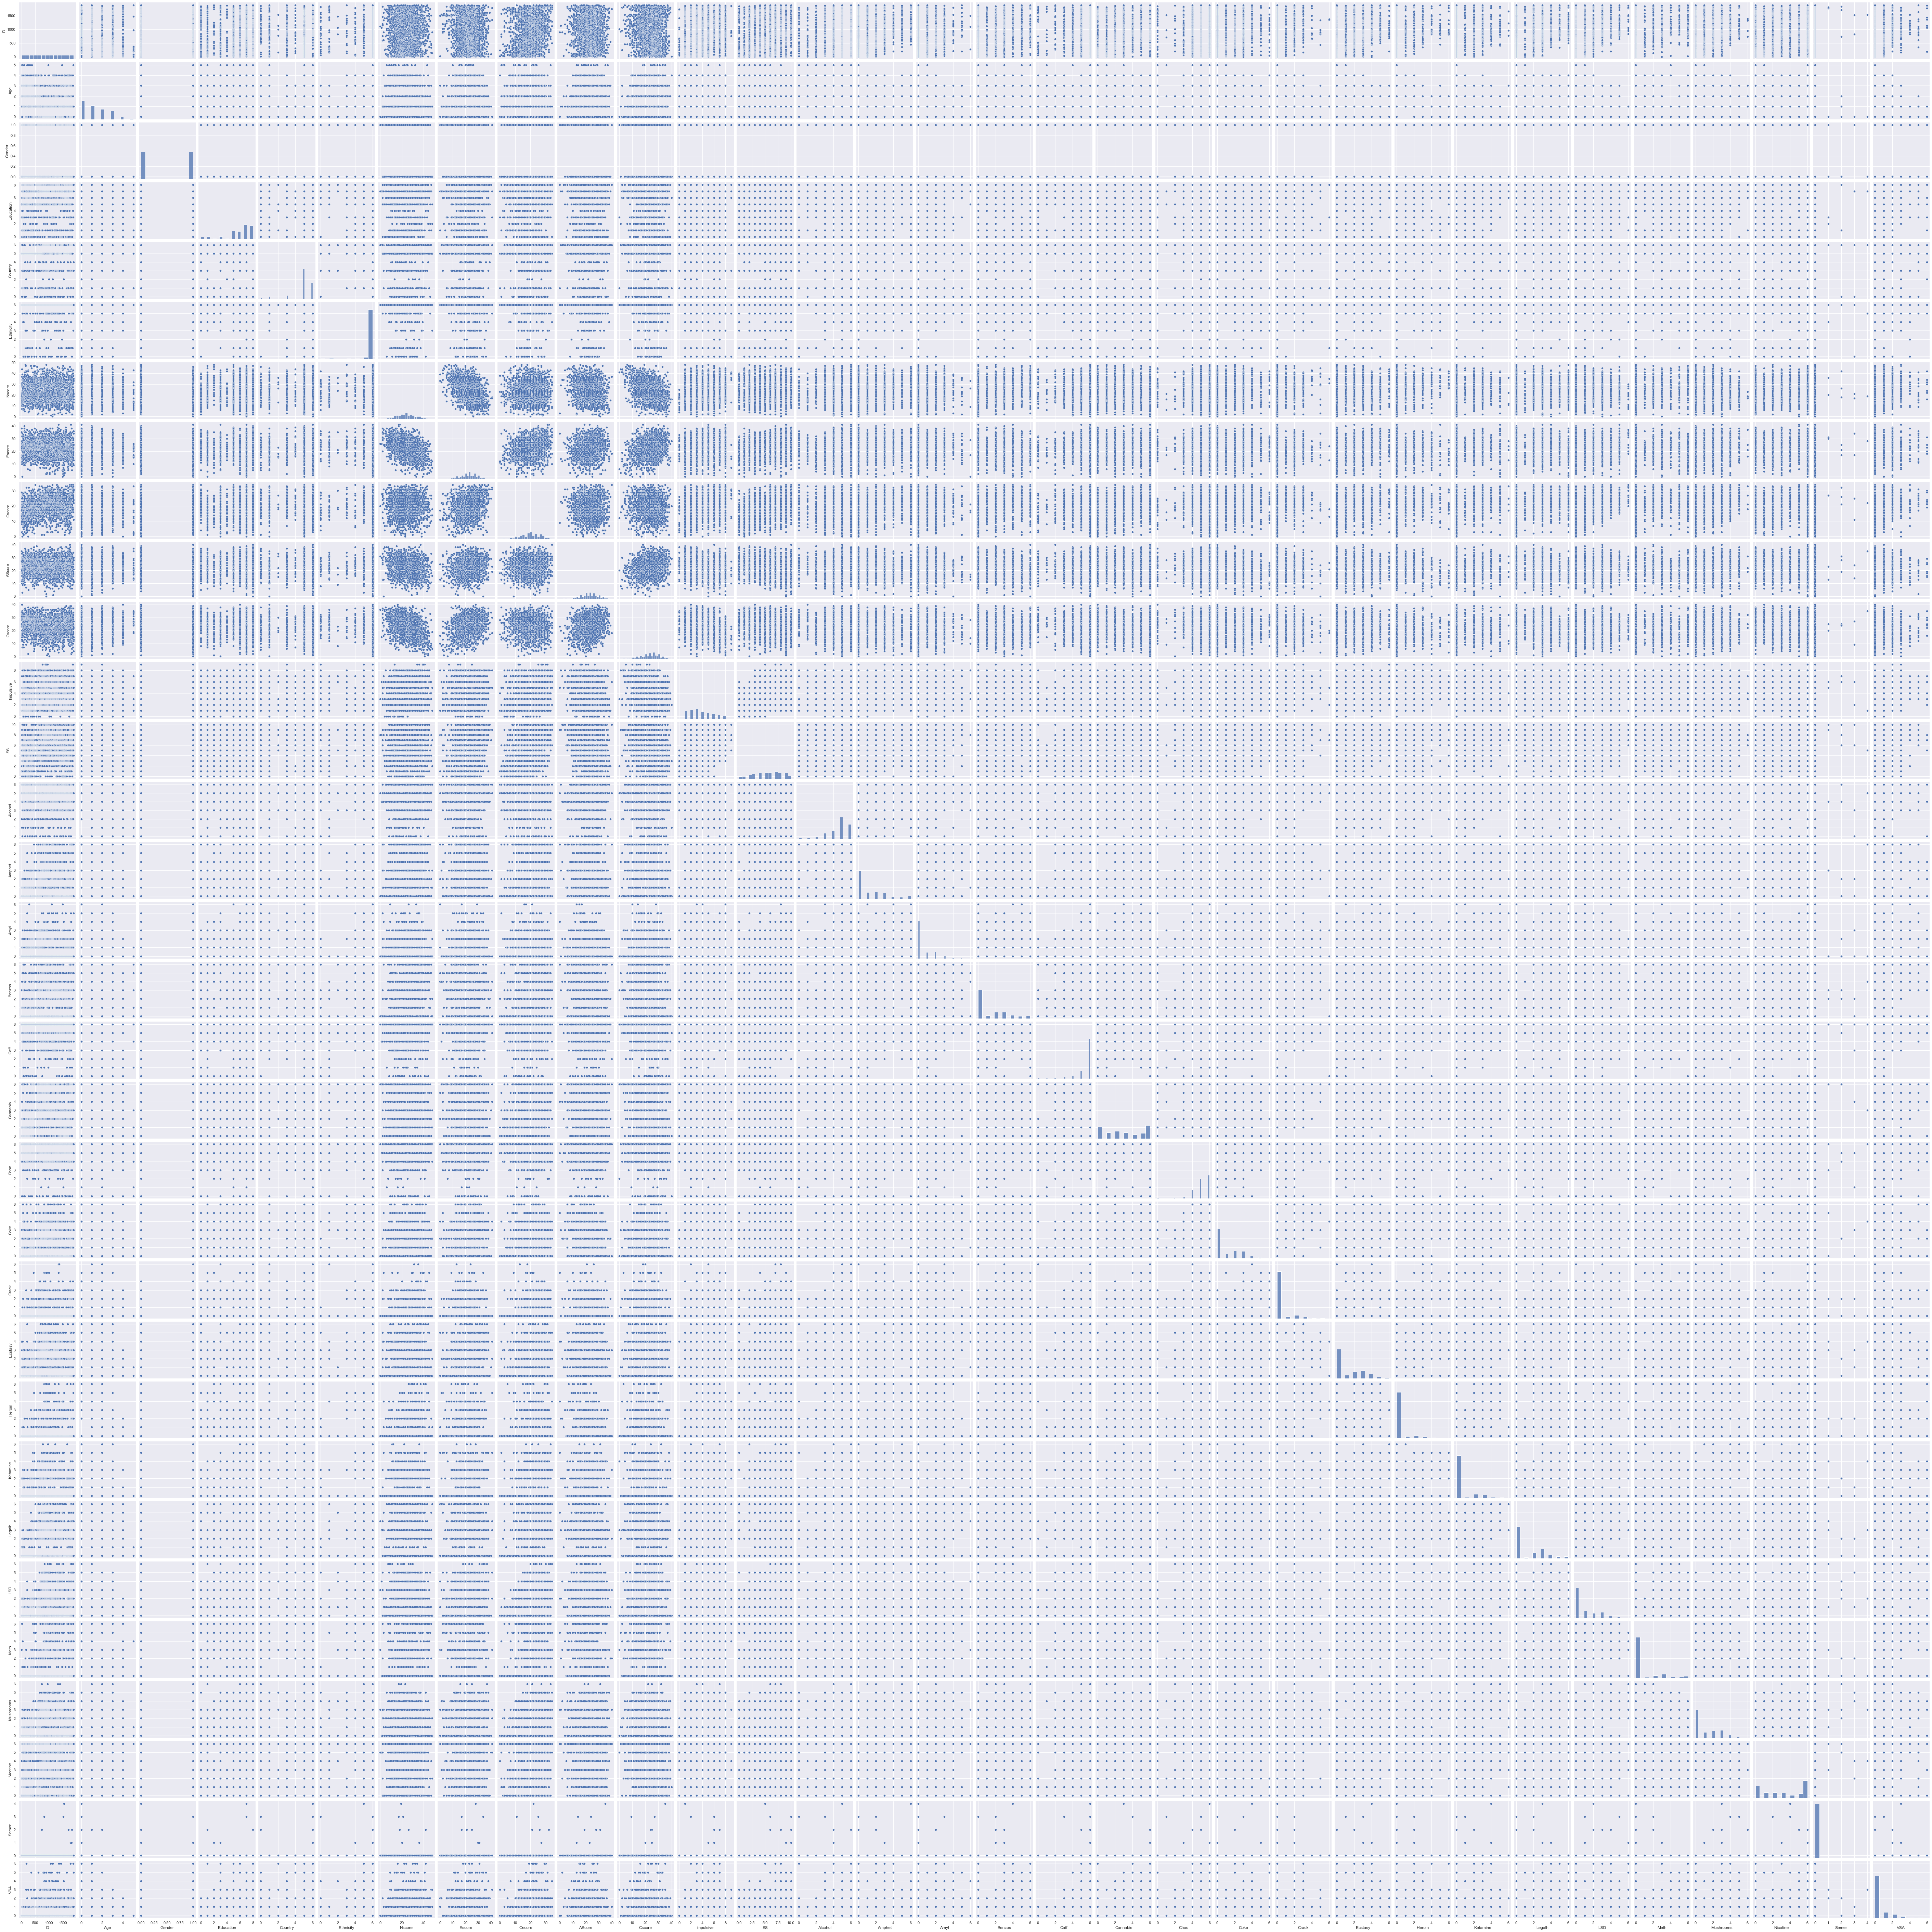

In [22]:
sns.pairplot(df)

In [23]:
df.corr()

ID       Age    Gender  Education   Country  Ethnicity  \
ID         1.000000 -0.272012  0.024573   0.078934  0.099721   0.014295   
Age       -0.272012  1.000000 -0.096275  -0.158622 -0.058773   0.035282   
Gender     0.024573 -0.096275  1.000000   0.004263 -0.017861   0.018328   
Education  0.078934 -0.158622  0.004263   1.000000  0.071282  -0.033270   
Country    0.099721 -0.058773 -0.017861   0.071282  1.000000  -0.027282   
Ethnicity  0.014295  0.035282  0.018328  -0.033270 -0.027282   1.000000   
Nscore     0.022772 -0.144452 -0.070235   0.040000  0.046874   0.007030   
Escore    -0.053121 -0.027030 -0.061462   0.000583 -0.007774  -0.037784   
Oscore     0.165658 -0.218098  0.135682   0.090849  0.049106   0.036216   
AScore    -0.031897  0.064208 -0.220793  -0.018051  0.025159  -0.003701   
Cscore    -0.079095  0.186753 -0.183843  -0.053884 -0.010872  -0.032870   
Impulsive  0.117778 -0.185776  0.163987   0.075810  0.021720   0.003860   
SS         0.162627 -0.331363  0.252646   0.092635  0.009429   0.035104   
Alcohol   -0.020045 -0.030361  0.002684   0.007230  0.028654   0.153463   
Amphet     0.169105 -0.245679  0.222704   0.054025 -0.001270   0.062697   
Amyl      -0.030257 -0.105550  0.162004   0.011473 -0.100185   0.088902   
Benzos     0.157334 -0.127892  0.133908   0.018263  0.057288   0.033773   
Caff      -0.006027  0.035496  0.011445  -0.006944  0.026413   0.127476   
Cannabis   0.208333 -0.436927  0.301102   0.078083  0.032134   0.102572   
Choc      -0.060614  0.045984 -0.074656   0.025254  0.021480   0.069434   
Coke       0.091031 -0.225343  0.176371   0.031056  0.009353   0.052798   
Crack      0.081910 -0.055030  0.151180  -0.025580  0.010685   0.009740   
Ecstasy    0.166659 -0.382138  0.228250   0.067072 -0.016953   0.064888   
Heroin     0.090923 -0.121119  0.136577   0.002582  0.078697   0.014202   
Ketamine   0.074434 -0.223364  0.189639   0.048468 -0.061120   0.042199   
Legalh     0.220319 -0.409919  0.315405   0.092986  0.034444   0.062813   
LSD        0.214780 -0.315063  0.278717   0.091357 -0.036553   0.048315   
Meth       0.175118 -0.189871  0.181282   0.012886  0.112135   0.052547   
Mushrooms  0.202362 -0.326602  0.272120   0.112801  0.005723   0.058641   
Nicotine   0.062794 -0.247545  0.191883   0.005852  0.003228   0.075704   
Semer      0.050439 -0.047517 -0.013389   0.005947 -0.020769  -0.062463   
VSA        0.100837 -0.226828  0.134656   0.011747  0.034268  -0.000112   

             Nscore    Escore    Oscore    AScore  ...   Ecstasy    Heroin  \
ID         0.022772 -0.053121  0.165658 -0.031897  ...  0.166659  0.090923   
Age       -0.144452 -0.027030 -0.218098  0.064208  ... -0.382138 -0.121119   
Gender    -0.070235 -0.061462  0.135682 -0.220793  ...  0.228250  0.136577   
Education  0.040000  0.000583  0.090849 -0.018051  ...  0.067072  0.002582   
Country    0.046874 -0.007774  0.049106  0.025159  ... -0.016953  0.078697   
Ethnicity  0.007030 -0.037784  0.036216 -0.003701  ...  0.064888  0.014202   
Nscore     1.000000 -0.433052  0.016901 -0.217148  ...  0.073276  0.178192   
Escore    -0.433052  1.000000  0.235327  0.159876  ...  0.072299 -0.083895   
Oscore     0.016901  0.235327  1.000000  0.031785  ...  0.295429  0.133055   
AScore    -0.217148  0.159876  0.031785  1.000000  ... -0.116223 -0.173516   
Cscore    -0.398676  0.318732 -0.060278  0.250299  ... -0.222017 -0.163313   
Impulsive  0.178544  0.108713  0.265493 -0.236228  ...  0.259588  0.200296   
SS         0.081593  0.201992  0.420719 -0.215916  ...  0.393489  0.208661   
Alcohol   -0.003672  0.091102  0.035267 -0.021840  ...  0.073716 -0.033735   
Amphet     0.135042 -0.046343  0.217889 -0.151148  ...  0.521800  0.360993   
Amyl       0.034927  0.029969  0.063336 -0.096152  ...  0.358797  0.129148   
Benzos     0.277094 -0.108307  0.201081 -0.169171  ...  0.342587  0.427241   
Caff       0.013919  0.053718  0.029506 -0.014601  ...  0.034187  0.014773   
Cannabis   0.102933 -0.019743  0.416525 -0.150688  ...  0.5

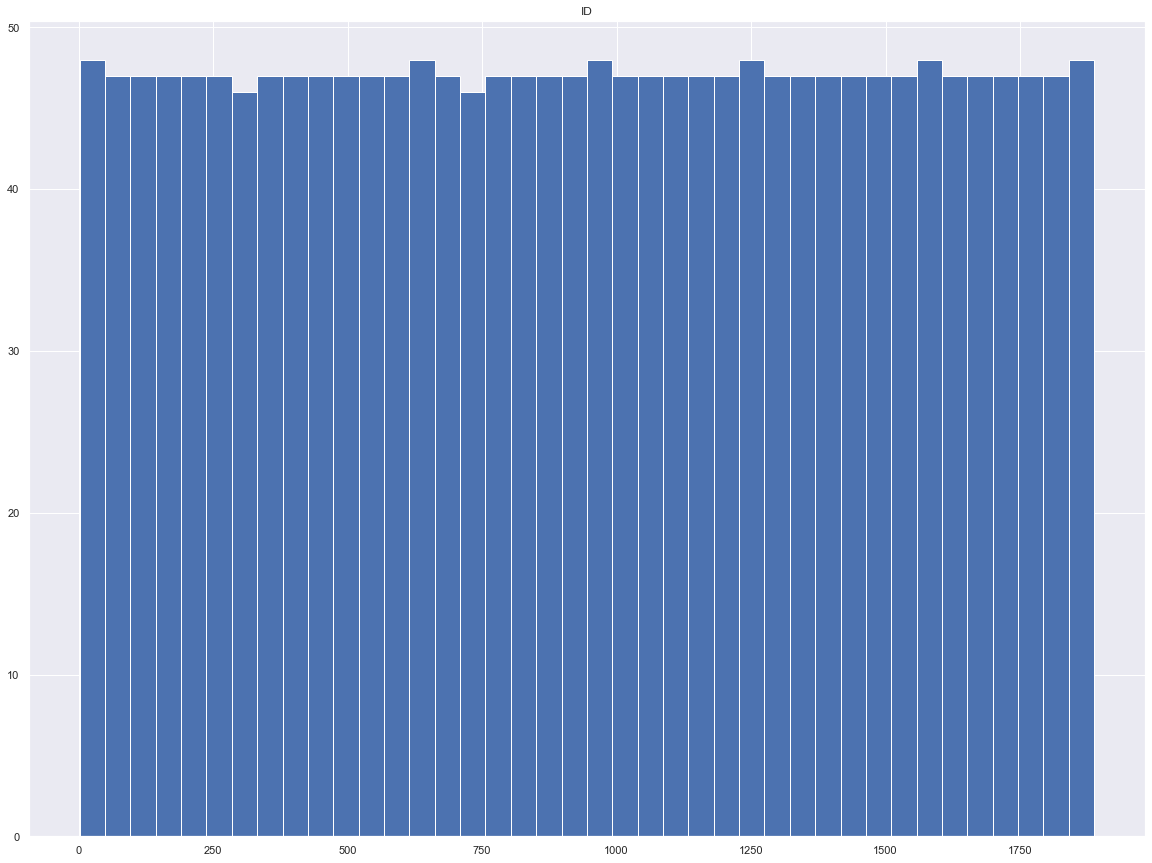

In [24]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()
# Histogram of all the numerical attributes

KNN Classification

In [25]:
from sklearn.model_selection import train_test_split
X= df.drop(['Age'], axis=1)
y= df['Age']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
X_train[num_atr] = X_train[num_atr].apply(le.fit_transform)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [28]:
X_train[num_atr].head()

ID
612    435
1367   954
1438  1004
919    638
427    297

In [29]:
ss = StandardScaler()
ss.fit_transform(X_train[flt_atr])

array([[-0.30760284,  0.63902978, -0.73371202, ...,  0.35798438,
         1.5154639 , -0.21681894],
       [-0.64027835, -0.41264499, -1.64917348, ..., -0.50431853,
        -1.33590144, -2.07004435],
       [ 1.13399101, -1.01360199, -0.73371202, ...,  0.93285298,
        -1.33590144, -1.69939927],
       ...,
       [ 0.02507266, -0.41264499,  0.02917252, ..., -0.64803568,
        -1.33590144, -0.21681894],
       [ 1.57755834,  0.33855127, -0.12340439, ...,  0.50170153,
         0.08978123, -0.21681894],
       [-2.52543953,  0.48879052,  1.24978779, ..., -1.22290429,
         1.04023634,  0.89511631]])

In [30]:
a = X_train[num_atr]
b = ss.transform(X_train[flt_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(1318, 8)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [32]:
ss = StandardScaler()
ss.fit_transform(X_test[flt_atr])
le = LabelEncoder()
X_test[num_atr] = X_test[num_atr].apply(le.fit_transform)
a1 = X_test[num_atr]
b1 = ss.transform(X_test[flt_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(566, 8)

In [33]:
y_pred = knn.predict(Xtr1)

In [34]:
confusion_matrix(y_test, y_pred)

array([[63, 57, 47, 32,  2,  0],
       [34, 41, 45, 18,  2,  0],
       [22, 14, 33, 14,  7,  0],
       [13, 21, 38, 19,  7,  0],
       [ 9,  5, 12,  5,  0,  0],
       [ 0,  1,  4,  1,  0,  0]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.2756183745583039

In [37]:
from sklearn.metrics import precision_recall_fscore_support

In [38]:
precision_recall_fscore_support(y_test, y_pred)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.44680851, 0.29496403, 0.18435754, 0.21348315, 0.        ,
        0.        ]),
 array([0.31343284, 0.29285714, 0.36666667, 0.19387755, 0.        ,
        0.        ]),
 array([0.36842105, 0.29390681, 0.24535316, 0.20320856, 0.        ,
        0.        ]),
 array([201, 140,  90,  98,  31,   6], dtype=int64))

In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(y_test, y_pred, average='weighted')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.29790989708945464

In [41]:
from sklearn.metrics import recall_score

In [42]:
recall_score(y_test, y_pred,average = 'weighted')

0.2756183745583039

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_test, y_pred,average = 'weighted')

0.277731109316707

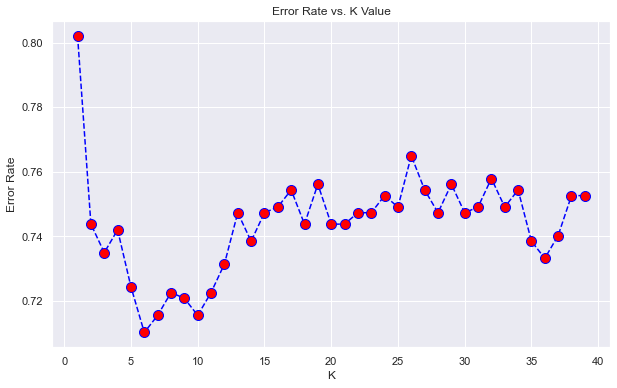

Minimum error:- 0.7102473498233215 at K = 6


In [45]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [46]:
knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [47]:
y_pred = knn.predict(Xtr1)

In [48]:
accuracy_score(y_test, y_pred)

0.25265017667844525

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
X= df.drop(['Age'], axis=1)
y= df['Age']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
y.shape

(1884,)

In [53]:
X.shape

(1884, 31)

In [54]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [55]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = dt.predict(Xtr1)

In [57]:
np.sum((y_test == y_pred))/y_test.size

0.23674911660777384

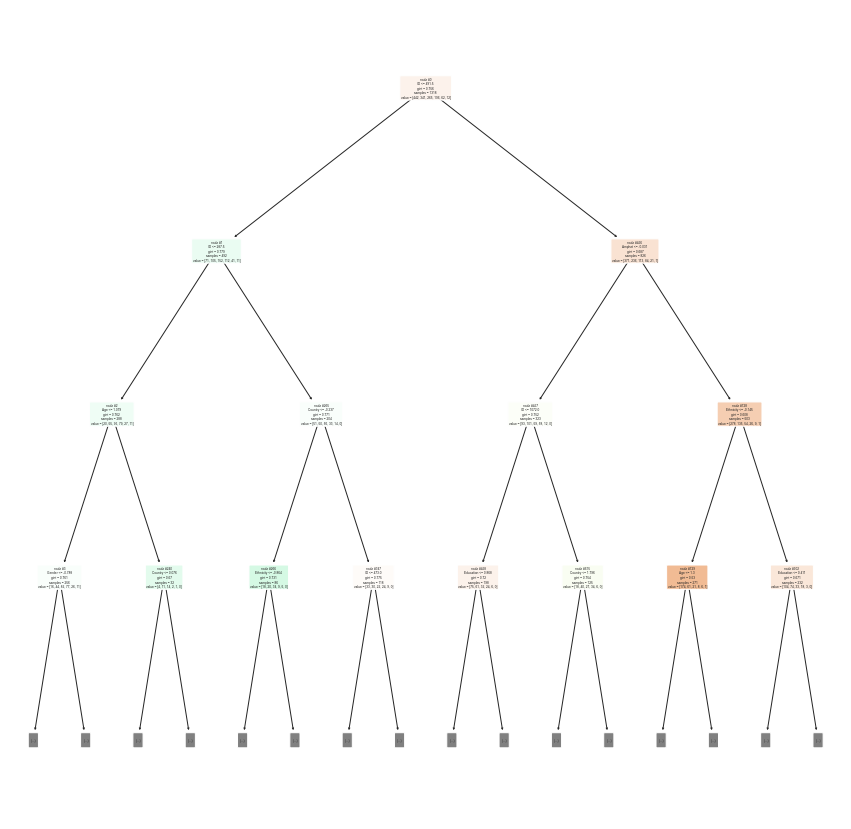

In [58]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['ID','Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                             'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                             'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer',
                             'VSA', 'Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS'],
                        )

_=plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28975265017667845


In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[67, 35, 87, 10,  2,  0],
       [32, 32, 57, 19,  0,  0],
       [10, 21, 41, 18,  0,  0],
       [14, 19, 42, 23,  0,  0],
       [ 5,  5, 14,  5,  1,  1],
       [ 0,  0,  2,  4,  0,  0]], dtype=int64)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.33      0.41       201
           1       0.29      0.23      0.25       140
           2       0.17      0.46      0.25        90
           3       0.29      0.23      0.26        98
           4       0.33      0.03      0.06        31
           5       0.00      0.00      0.00         6

    accuracy                           0.29       566
   macro avg       0.27      0.21      0.20       566
weighted avg       0.35      0.29      0.29       566



In [63]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
df.feature_names = df[['ID','Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                             'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
                             'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer',
                             'VSA', 'Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']]
df.target_names = df['Age']

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6208/1671925392.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['ID','Age', 'Gender', 'Education', 'Country', 'Ethnicity',
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_6208/1671925392.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['Age']


In [65]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

0     0.081626
7     0.058975
5     0.058001
6     0.056022
8     0.056017
9     0.055445
17    0.052378
11    0.046160
25    0.042516
2     0.042337
24    0.040644
10    0.037445
28    0.032677
15    0.031745
12    0.030939
27    0.029292
19    0.025997
13    0.024303
18    0.024212
21    0.023953
3     0.023665
14    0.022609
16    0.018737
1     0.015860
30    0.015177
26    0.013378
23    0.012150
20    0.011536
22    0.008668
4     0.007236
29    0.000297
dtype: float64

In [66]:
list(zip(df.columns, feature_imp))

[('ID', 0.08162629432748955),
 ('Age', 0.058975385253519814),
 ('Gender', 0.058001157248355764),
 ('Education', 0.05602248676774009),
 ('Country', 0.056017215704110314),
 ('Ethnicity', 0.05544485287739),
 ('Nscore', 0.05237818469257216),
 ('Escore', 0.04615960348399848),
 ('Oscore', 0.0425158112610055),
 ('AScore', 0.04233683434321543),
 ('Cscore', 0.04064392078597373),
 ('Impulsive', 0.03744525366578157),
 ('SS', 0.032677036062304425),
 ('Alcohol', 0.031745261337193395),
 ('Amphet', 0.03093898974300132),
 ('Amyl', 0.02929207746078283),
 ('Benzos', 0.025996901380211598),
 ('Caff', 0.024303459813134958),
 ('Cannabis', 0.02421249968547203),
 ('Choc', 0.023952782822847508),
 ('Coke', 0.023664782559551435),
 ('Crack', 0.02260879984174168),
 ('Ecstasy', 0.01873697345767807),
 ('Heroin', 0.015859850721552632),
 ('Ketamine', 0.015177423066839555),
 ('Legalh', 0.013378459873412272),
 ('LSD', 0.012150142705456904),
 ('Meth', 0.011535975288645256),
 ('Mushrooms', 0.008668266727257906),
 ('Nicoti

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


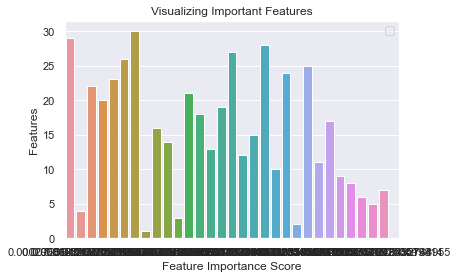

In [67]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.3003533568904594


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.32      0.40       201
           1       0.30      0.29      0.30       140
           2       0.17      0.41      0.24        90
           3       0.31      0.28      0.29        98
           4       0.00      0.00      0.00        31
           5       0.00      0.00      0.00         6

    accuracy                           0.30       566
   macro avg       0.22      0.22      0.21       566
weighted avg       0.34      0.30      0.30       566



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
